In [ ]:
# Siddharth Nagepalli 210968074
# Batch 3
# Week 6
# Exercise 2

In [ ]:
# Exercise 2: Text Analysis
# Download the amazon_baby.zip file and answer the following

In [53]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime

In [54]:
df=pd.read_csv("amazon_baby.csv")
df

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5
...,...,...,...
183526,Baby Teething Necklace for Mom Pretty Donut Sh...,Such a great idea! very handy to have and look...,5
183527,Baby Teething Necklace for Mom Pretty Donut Sh...,This product rocks! It is a great blend of fu...,5
183528,Abstract 2 PK Baby / Toddler Training Cup (Pink),This item looks great and cool for my kids.......,5
183529,"Baby Food Freezer Tray - Bacteria Resistant, B...",I am extremely happy with this product. I have...,5


In [55]:
df.isnull().any()

name       True
review     True
rating    False
dtype: bool

In [56]:
df.isnull().sum()

name      318
review    829
rating      0
dtype: int64

# Data Cleaning

In [57]:
df.dropna(subset=['name'],inplace=True)
df

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5
...,...,...,...
183526,Baby Teething Necklace for Mom Pretty Donut Sh...,Such a great idea! very handy to have and look...,5
183527,Baby Teething Necklace for Mom Pretty Donut Sh...,This product rocks! It is a great blend of fu...,5
183528,Abstract 2 PK Baby / Toddler Training Cup (Pink),This item looks great and cool for my kids.......,5
183529,"Baby Food Freezer Tray - Bacteria Resistant, B...",I am extremely happy with this product. I have...,5


In [58]:
df.isnull().any()

name      False
review     True
rating    False
dtype: bool

# 1. Check the number of the reviews received for each product

In [59]:
df['name'].value_counts()

Vulli Sophie the Giraffe Teether                                                                                                                                                                                                                                                                                                                       785
Simple Wishes Hands-Free Breastpump Bra, Pink, XS-L                                                                                                                                                                                                                                                                                                    562
Infant Optics DXR-5 2.4 GHz Digital Video Baby Monitor with Night Vision                                                                                                                                                                                                                                          

# 2. Check the products that have more than 15 reviews

In [60]:
df['name'].value_counts().loc[lambda x: x>15]


Vulli Sophie the Giraffe Teether                                                              785
Simple Wishes Hands-Free Breastpump Bra, Pink, XS-L                                           562
Infant Optics DXR-5 2.4 GHz Digital Video Baby Monitor with Night Vision                      561
Baby Einstein Take Along Tunes                                                                547
Cloud b Twilight Constellation Night Light, Turtle                                            520
                                                                                             ... 
Summer Infant Keep Me Clean Disposable Potty Protectors, Green/White,(Pack of 2), 10-Count     16
Vulli Products - Sophie The Giraffe Teething Ring - Gift Boxed! - 100% Natural rubber          16
Itzy Ritzy Shopping Cart and High Chair Cover, Avocado Damask                                  16
The First Years American Red Cross Deluxe Baby Healthcare and Grooming Kit                     16
Medela 100% Cotton W

# 3. Find any missing review are present or not, if present remove those data.

In [61]:
df.dropna(subset=['review'],inplace=True)
df

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5
...,...,...,...
183526,Baby Teething Necklace for Mom Pretty Donut Sh...,Such a great idea! very handy to have and look...,5
183527,Baby Teething Necklace for Mom Pretty Donut Sh...,This product rocks! It is a great blend of fu...,5
183528,Abstract 2 PK Baby / Toddler Training Cup (Pink),This item looks great and cool for my kids.......,5
183529,"Baby Food Freezer Tray - Bacteria Resistant, B...",I am extremely happy with this product. I have...,5


In [62]:
df.isnull().any()

name      False
review    False
rating    False
dtype: bool

In [63]:
df.isnull().sum()

name      0
review    0
rating    0
dtype: int64

# 4. Clean the data and remove the special characters and replace the contractions with its expansion by converting the uppercase character to lower case. Also, remove the punctuations.

In [64]:
contractions={
"a'ight":"alright",
"ain't":"are not",
"amn't":"am not",
"aren't":"are not",
"can't":"cannot",
"'cause": "because",
"could've":"could have",
"couldn't":"could not",
"couldn't've":"could not have",
"daren't":"dare not",
"daresn't":"dare not",
"dasn't":"dare not",
"didn't":"did not",
"doesn't":"does not",
"don't":"do not",
"everybody's":"everybody is",
"everyone's":"everyone is",
"giv'n":"given",
"gonna":"going to",
"gon't":"go not", 
"gotta":"got to",
"hadn't":"had not",
"had've":"had have",
"hasn't":"has not",
"haven't":"have not",
"he'd":	"he had", 
"he'll":"he will",
"he's":	"he is",
"here's":"here is",
"how'd":"how did",
"how'll":"how will",
"how're":"how are",
"how's":"how is",
"I'd":"I had",
"I'd've":"I would have",
"I'd'nt":"I would not",
"I'd'nt've":"I would not have",
"I'll":"I will",
"I'm":"I am",
"I've":"I have",
"isn't":"is not",
"it'd":"it would",
"it'll":"it will",
"it's":"it is",
"let's":"let us",
"ma'am":"madam",
"mayn't":"may not",
"may've":"may have",
"mightn't":"might not",
"might've":"might have",
"mustn't":"must not",
"mustn't've":"must not have",
"must've":"must have",
"needn't":"need not",
"needn't've":"need not have",
"o'clock":"of the clock",
"oughtn't":"ought not",
"oughtn't've":"ought not have",
"shan't":"shall not",
"she'd":"she would",
"she'll":"she will",
"she's":"she is",
"should've":"should have",
"shouldn't":"should not",
"shouldn't've":"should not have",
"somebody's":"somebody is",
"someone's":"someone is",
"something's":"something is",
"so're":"so are",
"so’s":"so is",
"so’ve":"so have",
"that'll":"that will",
"that're":"that are",
"that's":"that is",
"that'd":"that would",
"there'd":"there would",
"there'll":"there will",
"there're":"there are",
"there's":"there is",
"these're":"these are",
"these've":"these have",
"they'd":"they would",
"they'll":"they will",
"they're":"they are",
"they've":"they have",
"this's":"this is",
"those're":"those are",
"those've":"those have",
"to've":"to have",
"wasn't":"was not",
"we'd":"we would",
"we'd've":"we would have",
"we'll":"we will",
"we're":"we are",
"we've":"we have",
"weren't":"were not",
"what'd":"what did",
"what'll":"what will",
"what're":"what are",
"what's":"what is",
"what've":"what have",
"when's":"when is",
"where'd":"where did",
"where'll":"where will",
"where're":"where are",
"where's":"where is",
"where've":"where have",
"which'd":"which would",
"which'll":"which will",
"which're":"which are",
"which's":"which is",
"which've":"which have",
"who'd":"who would",
"who'd've":"who would have",
"who'll":"who will",
"who're":"who are",
"who's":"who is",
"who've":"who have",
"why'd":"why did",
"why're":"why are",
"why's":"why is",
"won't":"will not",
"would've":"would have",
"wouldn't":"would not",
"wouldn't've":"would not have",
"y'at":"you at",
"yes’m":"yes madam",
"you'd":"you would",
"you'll":"you will",
"you're":"you are",
"you've":"you have"}

In [65]:
def cont_to_exp(x):
    if type(x) is str:
        x = x.replace('\\','')
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        return x
    else:
        return x

In [66]:
df['review'] = df['review'].apply(lambda x:cont_to_exp(x))

In [67]:
df

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5
...,...,...,...
183526,Baby Teething Necklace for Mom Pretty Donut Sh...,Such a great idea! very handy to have and look...,5
183527,Baby Teething Necklace for Mom Pretty Donut Sh...,This product rocks! It is a great blend of fu...,5
183528,Abstract 2 PK Baby / Toddler Training Cup (Pink),This item looks great and cool for my kids.......,5
183529,"Baby Food Freezer Tray - Bacteria Resistant, B...",I am extremely happy with this product. I have...,5


# 5. Add the Polarity, length of the review, the word count and average word length of each review.

In [68]:
from textblob import TextBlob

In [69]:
# polarity column
df['polarity'] = df['review'].apply(lambda x: TextBlob(x).sentiment.polarity)

# review length column
df['review_len'] = df['review'].apply(lambda x:len(x))

# word count column
df['word_count'] = df['review'].apply(lambda x: len(x.split()))

In [70]:
def avg_word_len(x):
    words = x.split()
    wordlen = 0
    for word in words:
        wordlen = wordlen + len(word)
        
    return wordlen/len(words) 

In [71]:
df['avg_word_len'] = df['review'].apply(lambda x: avg_word_len(x))

In [72]:
df

,name,review,rating,polarity,review_len,word_count,avg_word_len
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3,0.083333,452,79,4.708861
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,0.367000,158,30,4.300000
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,0.293333,143,23,5.260870
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,0.318767,390,74,4.229730
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,0.727474,404,76,4.289474
...,...,...,...,...,...,...,...
183526,Baby Teething Necklace for Mom Pretty Donut Sh...,Such a great idea! very handy to have and look...,5,0.626000,137,27,4.111111
183527,Baby Teething Necklace for Mom Pretty Donut Sh...,This product rocks! It is a great blend of fu...,5,0.440625,354,64,4.515625
183528,Abstract 2 PK Baby / Toddler Training Cup (Pink),This item looks great and cool for my kids.......,5,0.650000,93,17,4.529412
183529,"Baby Food Freezer Tray - Bacteria Resistant, B...",I am extremely happy with this product. I have...,5,0.379694,854,170,4.029412


# 6. Visualize the distribution of the word count, review length, and polarity.

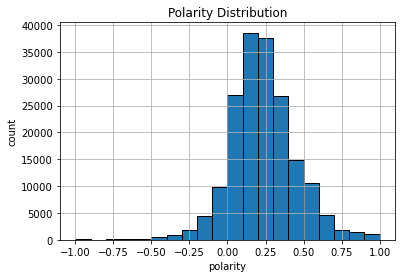

In [73]:
plot=df['polarity'].hist(edgecolor='k',bins=20)
plt.xlabel('polarity')
plt.ylabel('count')
plt.title('Polarity Distribution')
plt.show()

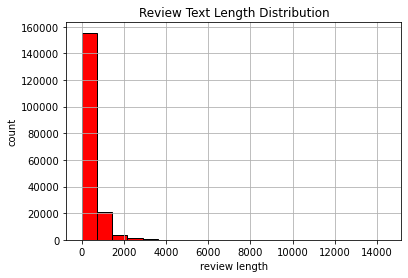

In [74]:
df['review_len'].hist(color='r',edgecolor='k',bins=20)
plt.xlabel('review length')
plt.ylabel('count')
plt.title('Review Text Length Distribution')
plt.show()

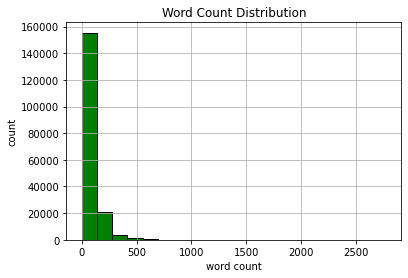

In [75]:
df['word_count'].hist(color='g',edgecolor='k',bins=20)
plt.xlabel('word count')
plt.ylabel('count')
plt.title('Word Count Distribution')
plt.show()

# 7. Visualize polarity considering the rating.


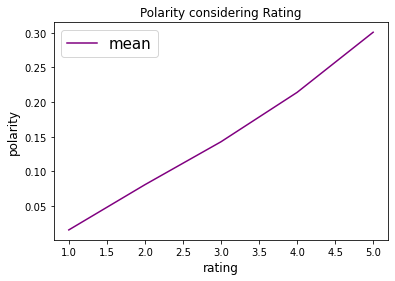

In [76]:
df.groupby(by='rating').polarity.agg([np.mean]).plot(color='purple')
plt.xlabel('rating',fontsize=12)
plt.ylabel('polarity',fontsize=12)
plt.title('Polarity considering Rating')
plt.legend(fontsize=15,loc='upper left')
plt.show()

# 8. Visualize the count of the reviews of each rating available in the dataset

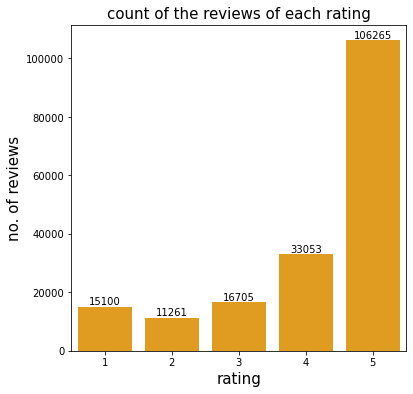

In [77]:
plt.figure(figsize=(6,6))
plot=sns.countplot(x='rating',data=df,color='orange')
plt.xlabel('rating',fontsize=15)
plt.ylabel('no. of reviews',fontsize=15)
plt.title('count of the reviews of each rating',fontsize=15)
plot.bar_label(plot.containers[0])
plt.show()

# 9. List the Top 20 products based on the polarity.

In [78]:
df.sort_values(by='polarity', ascending=False).head(20)

,name,review,rating,polarity,review_len,word_count,avg_word_len
182076,12 Baby Shower invitations Mod Mom Mix &amp; M...,Awesome! Great service!,5,1.0,23,3,7.000000
168039,Siliconies Egg Pendant - Silicone Necklace (Te...,If you kid likes to pull on jewelry and enjoys...,5,1.0,138,25,4.560000
162078,Harley Davidson Infant Girl or Boy 4 pc Boxed ...,I had a Harley Davidson cake made for a baby s...,5,1.0,117,23,4.086957
128221,"3 Packs of NUK Replacement Silicone Spout, Clear",NUK Silicone Spouts were as described. Came i...,5,1.0,127,20,5.250000
128223,"3 Packs of NUK Replacement Silicone Spout, Clear",These are the best tips on the Nuk Bottles tha...,5,1.0,134,28,3.821429
128236,Sock Ons Clever Little Things That Keep Baby S...,We purchased another set after receiving one a...,5,1.0,140,26,4.346154
155663,Babiators Unisex-Baby Infant Ops Junior Sungla...,best sunglasses ever......,5,1.0,26,3,8.000000
4307,"Philips AVENT Comfort Breast Shell Set, 2-Pack",EXCELLENT,5,1.0,9,1,9.000000
54465,Playtex Drop-Ins System Breast Milk Storage Kit,This product is a must have to connect with th...,5,1.0,141,24,4.833333
99744,Baby Trendsport Lite Stroller,Perfect for traveling. We got this because it ...,5,1.0,122,21,4.857143


# 10. Visualize to check whether the review length changes with rating.

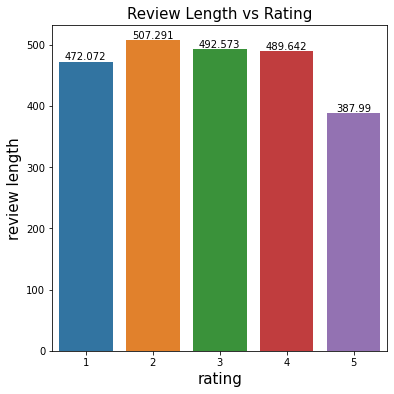

In [79]:
plt.figure(figsize=(6,6))
plot=sns.barplot(x='rating', y='review_len', data=df, ci=None)
plot.bar_label(plot.containers[0])
plt.xlabel('rating',fontsize=15)
plt.ylabel('review length',fontsize=15)
plt.title('Review Length vs Rating',fontsize=15)
plt.show()

# 11. Visualize the distribution of Top 25 Unigram, Bigram and Trigram.

In [80]:
from sklearn.feature_extraction.text import CountVectorizer

In [81]:
def top_words(x, n=25):
    vec = CountVectorizer(stop_words='english').fit(x)
    bag_of_words = vec.transform(x)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [82]:
words = top_words(df['review'], 25)
words

[('baby', 79491),
 ('great', 59416),
 ('just', 56440),
 ('use', 52917),
 ('like', 51567),
 ('love', 43790),
 ('seat', 43742),
 ('little', 41522),
 ('easy', 41116),
 ('old', 39368),
 ('does', 36640),
 ('really', 34948),
 ('product', 34001),
 ('time', 33402),
 ('son', 32158),
 ('did', 32125),
 ('bought', 31637),
 ('good', 29651),
 ('daughter', 27623),
 ('stroller', 26278),
 ('months', 26090),
 ('used', 23752),
 ('car', 23664),
 ('loves', 22336),
 ('recommend', 20702)]

In [83]:
dfu = pd.DataFrame(words, columns = ['UnigramText' , 'Count'])
dfu

,UnigramText,Count
0,baby,79491
1,great,59416
2,just,56440
3,use,52917
4,like,51567
5,love,43790
6,seat,43742
7,little,41522
8,easy,41116
9,old,39368


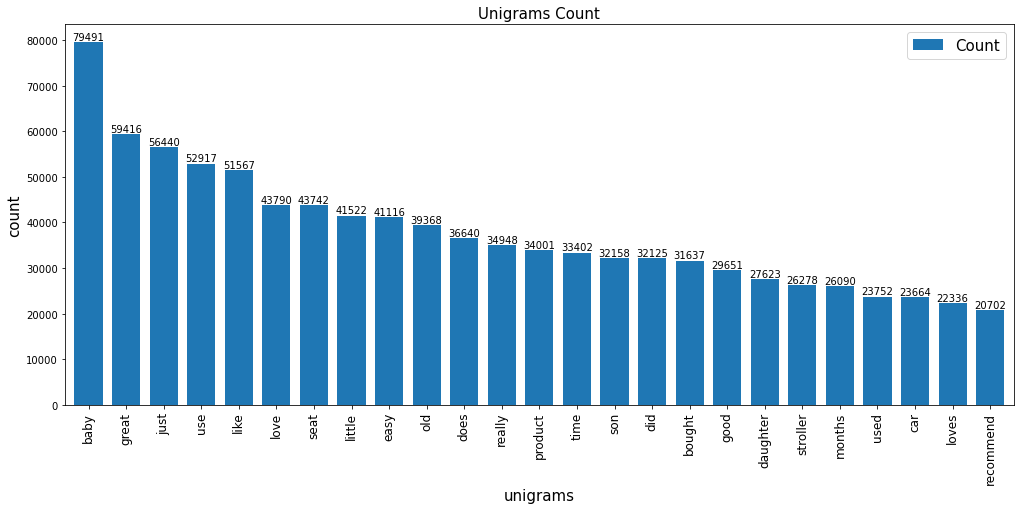

In [84]:

plot=dfu.plot.bar(x='UnigramText',y='Count',figsize=(17,7),width =0.75)
plt.legend(fontsize=15,loc='upper right')
plot.bar_label(plot.containers[0])
plt.xlabel('unigrams',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.xticks(fontsize=12)
plt.title('Unigrams Count',fontsize=15)
plt.show()

In [96]:
def top_bigram(x, n=25):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(x)
    bag_of_words = vec.transform(x)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [97]:
words = top_bigram(df['review'], 25)
words

[('car seat', 12429),
 ('month old', 12201),
 ('year old', 10190),
 ('months old', 6888),
 ('highly recommend', 6014),
 ('diaper bag', 5049),
 ('easy clean', 5011),
 ('easy use', 4754),
 ('works great', 3866),
 ('great product', 3793),
 ('really like', 2972),
 ('make sure', 2938),
 ('son loves', 2937),
 ('daughter loves', 2842),
 ('high chair', 2825),
 ('easy install', 2748),
 ('old son', 2729),
 ('good quality', 2493),
 ('recommend product', 2439),
 ('old daughter', 2314),
 ('baby shower', 2295),
 ('customer service', 2257),
 ('definitely recommend', 2232),
 ('old loves', 2128),
 ('pack play', 2012)]

In [98]:
dfb = pd.DataFrame(words, columns = ['BigramText' , 'Count'])
dfb

,BigramText,Count
0,car seat,12429
1,month old,12201
2,year old,10190
3,months old,6888
4,highly recommend,6014
5,diaper bag,5049
6,easy clean,5011
7,easy use,4754
8,works great,3866
9,great product,3793


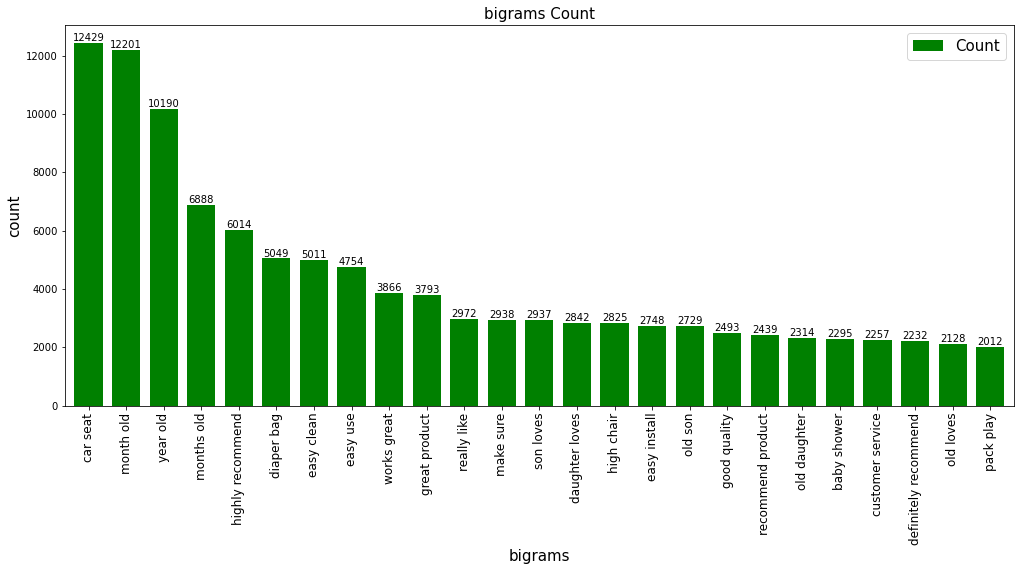

In [101]:
plot=dfb.plot.bar(x='BigramText',y='Count',figsize=(17,7),width =0.75,color='green')
plt.legend(fontsize=15,loc='upper right')
plot.bar_label(plot.containers[0])
plt.xlabel('bigrams',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.xticks(fontsize=12)
plt.title('bigrams Count',fontsize=15)
plt.show()

In [102]:
def top_trigram(x, n=25):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words="english").fit(x)
    bag_of_words = vec.transform(x)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [103]:
twords = top_trigram(df['review'], 25)
twords

[('month old son', 1426),
 ('month old daughter', 1163),
 ('son months old', 891),
 ('month old loves', 873),
 ('year old son', 837),
 ('baby shower gift', 819),
 ('highly recommend product', 776),
 ('year old daughter', 771),
 ('love love love', 707),
 ('daughter months old', 690),
 ('10 month old', 624),
 ('infant car seat', 610),
 ('18 month old', 575),
 ('month old baby', 553),
 ('baby months old', 535),
 ('year old loves', 524),
 ('dr brown bottles', 477),
 ('bought year old', 433),
 ('bought month old', 429),
 ('old son loves', 427),
 ('months old loves', 419),
 ('just right size', 413),
 ('just make sure', 400),
 ('car seat stroller', 396),
 ('don waste money', 393)]

In [104]:
dft = pd.DataFrame(twords, columns = ['TrigramText' , 'Count'])
dft

,TrigramText,Count
0,month old son,1426
1,month old daughter,1163
2,son months old,891
3,month old loves,873
4,year old son,837
5,baby shower gift,819
6,highly recommend product,776
7,year old daughter,771
8,love love love,707
9,daughter months old,690


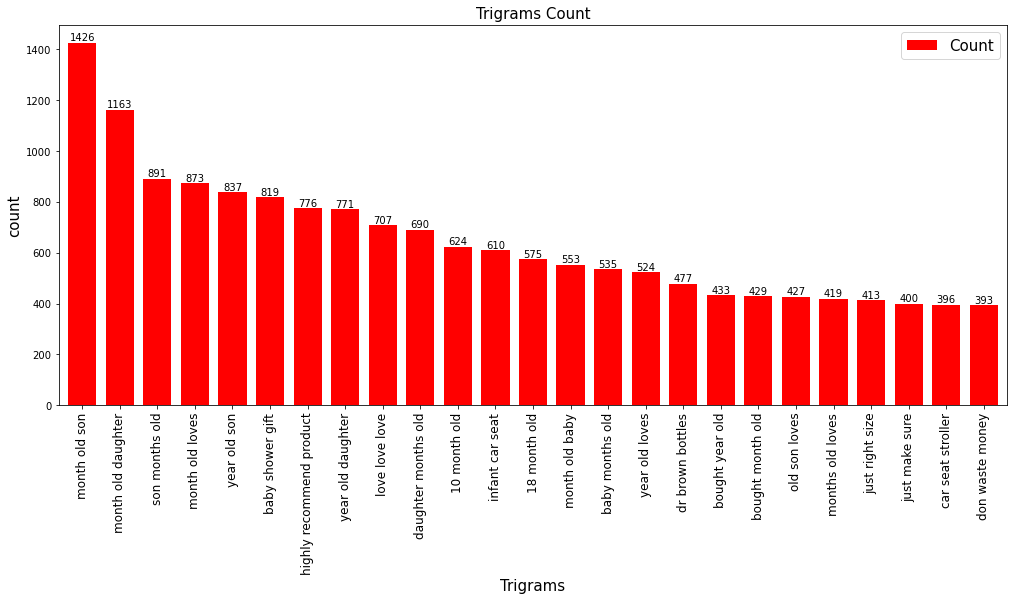

In [105]:
plot=dft.plot.bar(x='TrigramText',y='Count',figsize=(17,7),width =0.75,color='red')
plt.legend(fontsize=15,loc='upper right')
plot.bar_label(plot.containers[0])
plt.xlabel('Trigrams',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.xticks(fontsize=12)
plt.title('Trigrams Count',fontsize=15)
plt.show()